<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [7]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [8]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [9]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [10]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Task 2


Text(0.5, 1.0, 'Median value of owner-occupied homes boxplot in $1000s')

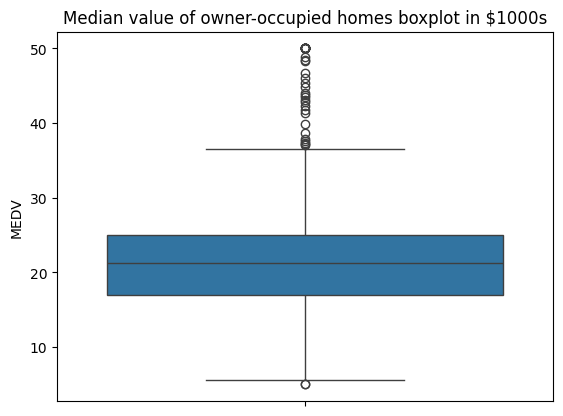

In [11]:
#Box plot of MEDV

ax= sns.boxplot(y = 'MEDV', data=boston_df)
ax.set_title('Median value of owner-occupied homes boxplot in $1000s')

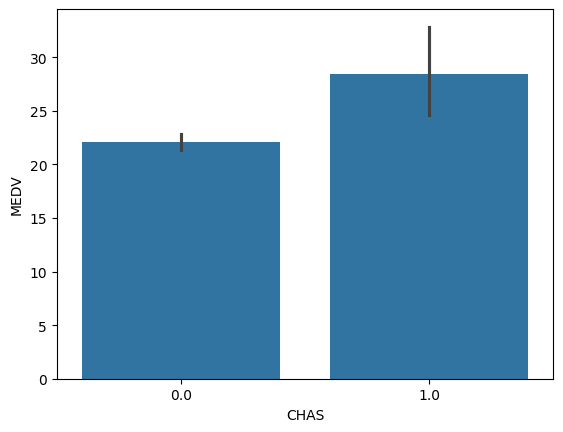

In [12]:
#bar plot of charles river
ax=sns.barplot(x = 'CHAS', y = 'MEDV', data=boston_df)

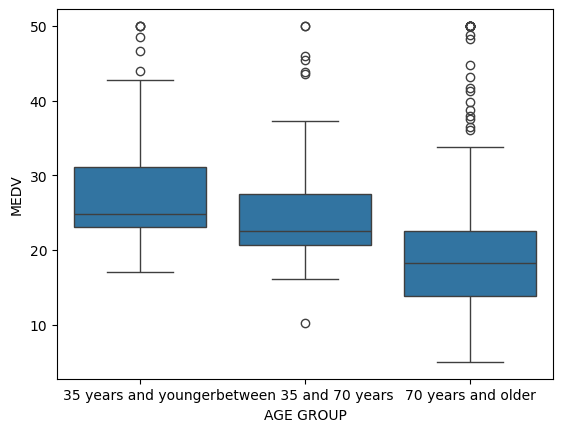

In [13]:

#MEDV VS AGE Boxplot
bins = [0, 35, 70, 100]
labels = ['35 years and younger', 'between 35 and 70 years', '70 years and older']
boston_df['AGE GROUP'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)
ax=sns.boxplot(y = 'MEDV', x = 'AGE GROUP', data=boston_df)


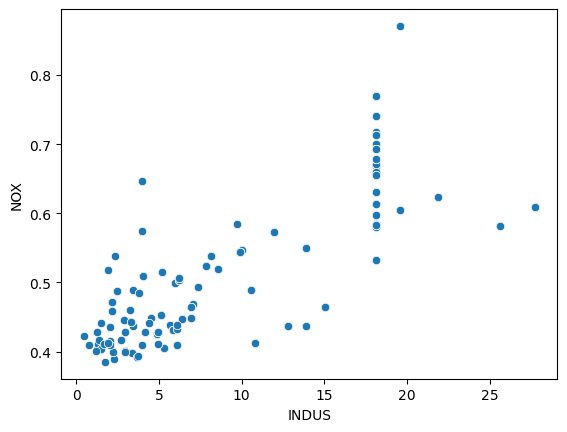

In [14]:
ax=sns.scatterplot(x = 'INDUS', y = 'NOX', data=boston_df)

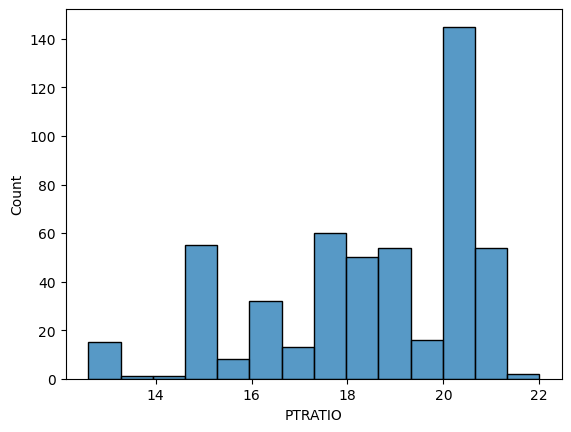

In [15]:
ax=sns.histplot(x = 'PTRATIO', data=boston_df)

# Task 3: Hypothesis Testing

## Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

### H0: There is no significant difference in median value of houses bounded by the Charles river
### H1: There is a significant difference in median value of houses bounded by the Charles river


In [19]:

# Check the unique values in the 'CHAS' column to make sure the conditions are correct
print(boston_df['CHAS'].unique())

# Subset the data based on 'CHAS' values and check if these subsets are not empty
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']

print(chas_1.head())
print(chas_0.head())

# Perform Levene's test to check for equality of variances
levene_stat, levene_p = scipy.stats.levene(chas_1, chas_0, center='mean')
print(f'Levene’s test statistic: {levene_stat}, p-value: {levene_p}')

# Perform the t-test if Levene’s test is passed
t_stat, p_value = scipy.stats.ttest_ind(chas_1, chas_0, equal_var=(levene_p > 0.05))
print(f'T-test statistic: {t_stat}, p-value: {p_value}')


[0. 1.]
142    13.4
152    15.3
154    17.0
155    15.6
160    27.0
Name: MEDV, dtype: float64
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64
Levene’s test statistic: 8.75190489604598, p-value: 0.003238119367639829
T-test statistic: 3.113291312794837, p-value: 0.003567170098137517
